## 小技集

# pip3　を含むライブラリのパス

# pip3 show <インストールモジュール名>

# Warning　消す　コード

# [[]]にすることでDataFrameまま参照できる

# 分散とバイアス

# arrayの適当な作り方

In [96]:
import numpy as np
a = np.arange(10).reshape(2,5)
a

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

# 1次元の変換方法

In [97]:
a = a.flatten()
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# DataFrameの適当な作り方　とDataFrame.dtypesの使い方

In [9]:
import pandas as pd
for_index = [1,2,3,4,5,6]
df = pd.DataFrame(np.random.randn(6,4),index = for_index, columns = list("ABCD"))
df

,A,B,C,D
1,-0.891358,-0.274516,0.549598,-0.309946
2,0.446167,-0.017608,-0.551971,-1.708364
3,-0.225394,0.838200,0.084041,-0.893163
4,-1.829952,-1.252180,0.447295,-1.063443
5,0.257206,0.252093,-0.517108,-0.332730
6,-0.457731,-1.206986,0.940134,-1.449671


In [99]:
df2 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3] * 4,dtype='int32'),
                     'E' : pd.Categorical(["test","train","test","train"]),
                     'F' : 'foo' })

In [100]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [101]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

# DataFrameの groupbyの使い方

In [102]:
group = df2.groupby('E')
group.sum() ## mean(), min(), max(), std(), var()

,A,C,D
E,,,
test,2.0,2.0,6
train,2.0,2.0,6


In [103]:
import pandas as pd
import seaborn as sns
import numpy as np
iris_df = sns.load_dataset("iris")

In [104]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [105]:
iris_df.groupby('species').agg(lambda x: max(x)-min(x))

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,1.5,2.1,0.9,0.5
versicolor,2.1,1.4,2.1,0.8
virginica,3.0,1.6,2.4,1.1


# fit_transform　とか結構DataFrameとnp.arrayどちらもうけつけてる

# DataFrameから、object　のタイプの列だけ取り出したい場合

# 回帰と分類の大きな分け方

# pandas　表示形式を指定

# QQ-plot　というのをとる(Seriesを入れれば手に入る)

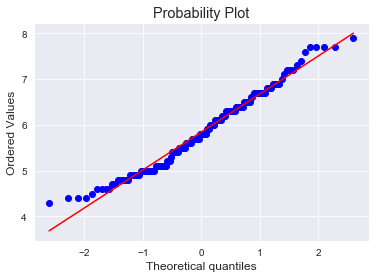

In [106]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
fig = plt.figure()

res = stats.probplot(iris_df.sepal_length, plot=plt)

# seabornを使って、例えば欠損値率をバーグラフに表したりできる。Seriesを入力するが、sns.barplot(Seriesのindex, Series)　で表示できる。

In [107]:
import seaborn as sns
#color = sns.color_palette()
#sns.set_style('darkgrid')

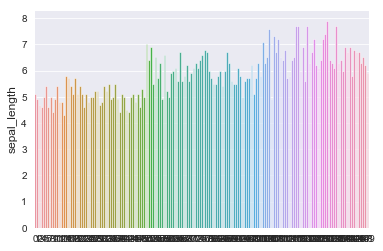

In [108]:
sns.barplot(x=iris_df.sepal_length.index, y=iris_df.sepal_length)

# Correlation mapの計算と、map表示の仕方

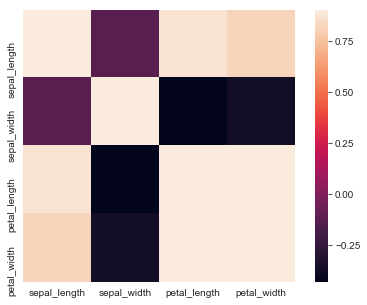

In [116]:
# iris_df.corr()とやったら自動的にnumerical　valueのみ抽出して表示してくれる
corrmat = iris_df.corr()
plt.subplots(figsize=(7,5))
sns.heatmap(corrmat, vmax=0.9, square=True)

# groupbyとtransformを組み合わせて、グループごとの平均とかを欠損値の埋め合わせにしたい時

In [117]:
df = pd.DataFrame({
    'city': ['osaka', 'osaka', 'osaka', 'osaka', 'tokyo', 'tokyo', 'tokyo'],
    'food': ['apple', 'orange', 'banana', 'banana', 'apple', 'apple', 'banana'],
    'price': [100, 200, 250, 300, 150, 200, 400],
    'quantity': [1, 2, 3, 4, 5, 6, 7]
})
df

,city,food,price,quantity
0,osaka,apple,100,1
1,osaka,orange,200,2
2,osaka,banana,250,3
3,osaka,banana,300,4
4,tokyo,apple,150,5
5,tokyo,apple,200,6
6,tokyo,banana,400,7


In [130]:
df.groupby(['city']).transform(lambda x: (x/x.sum()*100).astype(str)+'%')

,price,quantity
0,11.76470588235294%,10.0%
1,23.52941176470588%,20.0%
2,29.411764705882355%,30.0%
3,35.294117647058826%,40.0%
4,20.0%,27.77777777777778%
5,26.666666666666668%,33.33333333333333%
6,53.333333333333336%,38.88888888888889%


In [150]:
df[df['city']=='osaka']

,city,food,price,quantity
0,osaka,apple,100,1
1,osaka,orange,200,2
2,osaka,banana,250,3
3,osaka,banana,300,4


## KFold　使い方

In [154]:
df_kfold = df.price
df_kfold

0    100
1    200
2    250
3    300
4    150
5    200
6    400
Name: price, dtype: int64

In [159]:
# それぞれ学習用データと検証用データのインデックスをnd.arrayで取り出せる。

from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
for train, test in kf.split(df_kfold):
    print(train, test)

[3 4 5 6] [0 1 2]
[0 1 2 5 6] [3 4]
[0 1 2 3 4] [5 6]


## concatの使い方

In [161]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                   index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                   index=[4, 5, 6, 7])


In [165]:
# これは縦につなげる方法
# 3つとか並べても大丈夫
pd.concat([df1, df2])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [167]:
df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'],
                    'D': ['D2', 'D3', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']},
                   index=[2, 3, 6, 7])

In [168]:
# これは横につなげる方法
pd.concat([df1, df4], axis=1)

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


## nd.arrayのいろいろな合体方法

In [2]:
import numpy as np
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
c = np.array([[1, 2], [3, 4]])
d = np.array([[5, 6], [7, 8]])

In [3]:
np.vstack((a, b))

array([[1, 2, 3],
       [4, 5, 6]])

In [4]:
np.hstack((a, b))

array([1, 2, 3, 4, 5, 6])

In [5]:
np.column_stack((a, b))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [6]:
np.column_stack((c, d))

array([[1, 2, 5, 6],
       [3, 4, 7, 8]])

## PCA()　次元削減

In [ ]:
import pandas as pd
for_index = [1,2,3,4,5,6]
df = pd.DataFrame(np.random.randn(6,4),index = for_index, columns = list("ABCD"))
df

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df)
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum

In [ ]:
# dは95%以上の次元を指定する。95%をちょうど超えたindexは0から数えているため、それに1を足す。
d = np.argmax(cumsum >= 0.95)+1
d

## kaggle　便利なコマンド

In [ ]:
ダウンロードデータ確認
kaggle competitions files 確認
kaggle competitions files santander-value-prediction-challenge

In [ ]:
データダウンロード
kaggle competitions download -c コンペ名
kaggle competitions download -c santander-value-prediction-challenge

In [ ]:
データ一部だけダウンロード
kaggle competitions download コンペ名 -f ファイル名
kaggle competitions download favorita-grocery-sales-forecasting -f test.csv.7z

In [ ]:
提出
kaggle competitions submit コンペ名 -f 提出ファイル（submission.csv等） -m "提出メッセージ"
kaggle competitions submit favorita-grocery-sales-forecasting -f sample_submission_favorita.csv.7z -m "My submission message"

In [ ]:
leader board確認
kaggle competitions leaderboard コンペ名 -s
kaggle competitions leaderboard santander-value-prediction-challenge -s

In [ ]:
開催中コンペ一覧
kaggle competitions list
コンペサーチで一覧
kaggle competitions list -s 単語

In [1]:
import numpy as np
kei1 = np.array([1,2])
kei2 = np.array([3,4])

In [2]:
np.r_[kei1, kei2]

array([1, 2, 3, 4])

In [16]:
np.c_[kei1, kei2]

array([[1, 3],
       [2, 4]])

In [23]:
a = np.zeros((0,2))
a

array([], shape=(0, 2), dtype=float64)

In [26]:
np.r_[a, kei1.reshape(1,-1)].astype(int)

array([[1, 2]])

# any, all　の使い方

In [4]:
import numpy as np
a = np.array([
    [1,1,1],
    [1,0,0],
    [1,0,1]
])

In [5]:
b = np.ones((3,3))

In [6]:
np.all(a)

False

In [7]:
np.all(b)

True

In [9]:
np.all(a<2)

True

In [10]:
np.all(a,axis=0)

array([ True, False, False])

In [11]:
a = np.array([
    [3,8,9],
    [2,3,4]
])

In [17]:
np.any(a==8)

True

In [16]:
np.any(a%2==0, axis=1, keepdims=True) #keepdimsは出力次元もそのままにする

array([[ True],
       [ True]])

# np.insert, vstack, hstackの使い方

In [25]:
a = np.arange(100,112).reshape(3,4)
a

array([[100, 101, 102, 103],
       [104, 105, 106, 107],
       [108, 109, 110, 111]])

In [29]:
b = np.arange(1,13).reshape(3,4)
b

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [31]:
np.insert(a, 2, b, axis=0)

array([[100, 101, 102, 103],
       [104, 105, 106, 107],
       [  1,   2,   3,   4],
       [  5,   6,   7,   8],
       [  9,  10,  11,  12],
       [108, 109, 110, 111]])

In [36]:
np.vstack((a,b))

array([[100, 101, 102, 103],
       [104, 105, 106, 107],
       [108, 109, 110, 111],
       [  1,   2,   3,   4],
       [  5,   6,   7,   8],
       [  9,  10,  11,  12]])

In [37]:
np.hstack((a,b))

array([[100, 101, 102, 103,   1,   2,   3,   4],
       [104, 105, 106, 107,   5,   6,   7,   8],
       [108, 109, 110, 111,   9,  10,  11,  12]])